# Mean Reversion Strategy
    Use RSI and MA to generate BUY / SELL signals

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [6]:
ticker = 'AAPL'
data = yf.download(tickers=ticker, start = '2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [7]:
ma_period = 20
rsi_period = 14
rsi_oversold = 30
rsi_overbought = 70
data['MA'] = data['Adj Close'].rolling(window = ma_period).mean()
delta = data['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
n = 14
# get initial avg - for row n
avg_gain = gain.rolling(window=n, min_periods=n).mean()
avg_loss = loss.rolling(window=n, min_periods=n).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1+ rs))
# data.to_csv('rsi.csv')

data['Signal'] = np.where((data['Adj Close'] < data['MA']) & (data['RSI'] < rsi_oversold), 'Buy', '')
data['Signal'] = np.where((data['Adj Close'] > data['MA']) & (data['RSI'] > rsi_overbought), 'Sell', data['Signal'])

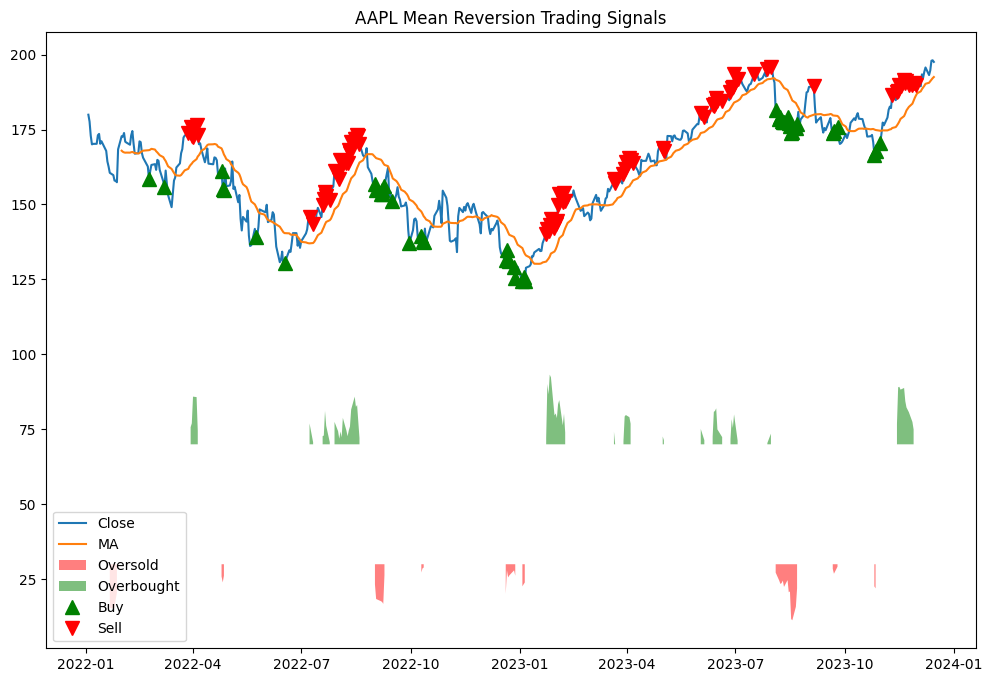

In [8]:
# Plot the historical prices and trading signals
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data.index, data['Adj Close'], label='Close')
ax.plot(data.index, data['MA'], label='MA')
ax.fill_between(data.index, data['RSI'], 30, where=(data['RSI'] <= 30), facecolor='red', alpha=0.5)
ax.fill_between(data.index, data['RSI'], 70, where=(data['RSI'] >= 70), facecolor='green', alpha=0.5)
ax.plot(data[data['Signal'] == 'Buy'].index, data['Adj Close'][data['Signal'] == 'Buy'], '^', markersize=10, color='g')
ax.plot(data[data['Signal'] == 'Sell'].index, data['Adj Close'][data['Signal'] == 'Sell'], 'v', markersize=10, color='r')
ax.set_title(f'{ticker} Mean Reversion Trading Signals')
ax.legend(['Close', 'MA', 'Oversold', 'Overbought', 'Buy', 'Sell'])
plt.show()